In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

In [ ]:
#feature importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [ ]:
#KNN
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#SVM
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [ ]:
#logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score , f1_score

In [ ]:
# Random Forest
# Data modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [ ]:
data_main = np.genfromtxt(r'C:\Users\Moloudhajimoradi\Desktop\personal\SYDE 657\Project\TRIPS_NTS2020_PUMF_processed.csv', delimiter=',' , names=True , skip_header=0)

In [ ]:
#remove 1.international trip (just consider trip inside Canada) 2.skip and not stated data 3. distance <= 50 (short-distance)
i = np.where((data_main['MDCNTRY'] != 99996.0) | (data_main['GND_D01'] == 7) | (data_main['GND_D01'] == 99 ) | (data_main['DISTANCE'] == 99999) | (data_main['INCOMGR2'] == 9) | (data_main['GND_D01'] == 5) | (data_main['SPD_DTOT'] == 9999999) | (data_main['SPD_DTOT'] < 10) | (data_main['MDCMA2'] == 0 ) | (data_main['DISTANCE'] <= 50 ))
data_t = np.delete(data_main, i, 0)

In [ ]:
X = np.column_stack((data_t['DISTANCE'], data_t['DURATION'], data_t['MREASON'], data_t['AGE_GRP'], data_t['GEND_BIN'], data_t['INCOMGR2'], data_t['GNCQ06A'], data_t['GNCQ06B'], data_t['MDPROV'], data_t['SPD_DTOT']))
y = data_t['GND_D01']

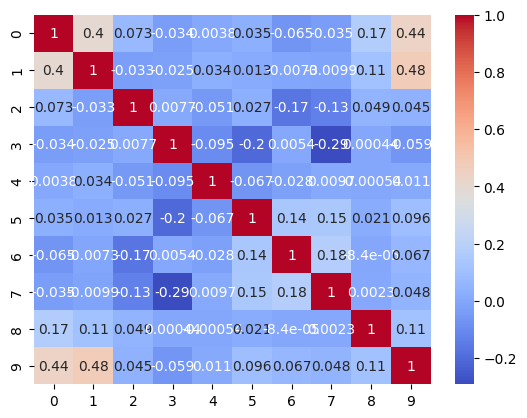

In [ ]:
# Calculate correlation matrix
corr_matrix = np.corrcoef(X, rowvar=False)

# Visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
###########################
counter = Counter(y)
print(counter)

Counter({2.0: 8803, 1.0: 543, 4.0: 149, 6.0: 101, 3.0: 82})


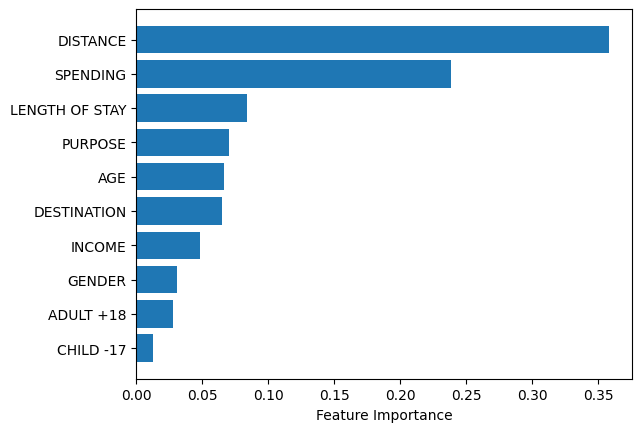

In [ ]:
#feature importance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)
sort = rf.feature_importances_.argsort()
features = np.array(['DISTANCE', 'LENGTH OF STAY', 'PURPOSE', 'AGE', 'GENDER', 'INCOME', 'ADULT +18', 'CHILD -17', 'DESTINATION', 'SPENDING'])
plt.barh(features[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")
plt.show()

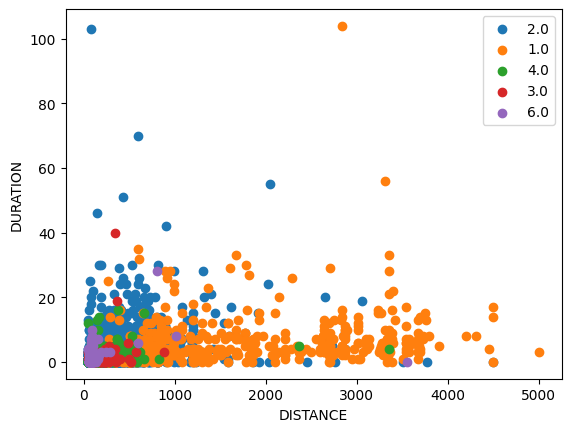

Counter({2.0: 8803, 1.0: 543, 4.0: 149, 6.0: 101, 3.0: 82})


In [ ]:
# scatter plot of examples by class label
FI = np.column_stack((data_t['DISTANCE'], data_t['DURATION']))
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(FI[row_ix, 0], FI[row_ix, 1], label=str(label))
pyplot.xlabel("DISTANCE")
pyplot.ylabel("DURATION")
pyplot.legend()
pyplot.show()
counter = Counter(y)
print(counter)

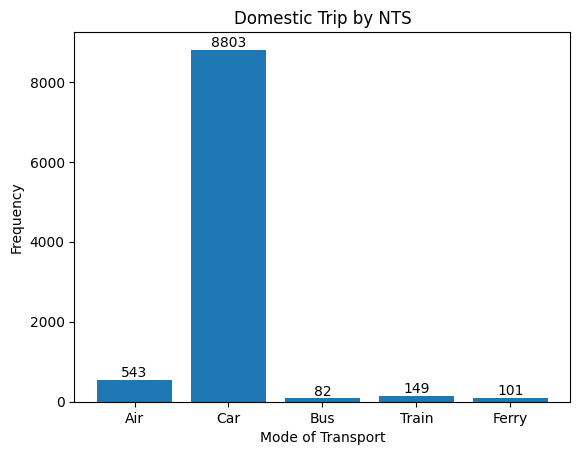

In [ ]:
import matplotlib.pyplot as plt

modes_of_transport = ['Air', 'Car', 'Bus', 'Train', 'Ferry']
Frequency_IMB = [543, 8803, 82, 149, 101]
plt.bar(modes_of_transport, Frequency_IMB)
for i, v in enumerate(Frequency_IMB):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Domestic Trip by NTS')
plt.xlabel('Mode of Transport')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#over_sampling and under-sampling
over = SMOTE(sampling_strategy={1.0: 1388, 3.0: 1186, 4.0: 1217, 6.0: 1193})
under = RandomUnderSampler(sampling_strategy={2.0: 6000})
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_resampled, y_resampled = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_resampled)
print(counter)

Counter({2.0: 6000, 1.0: 1388, 4.0: 1217, 6.0: 1193, 3.0: 1186})


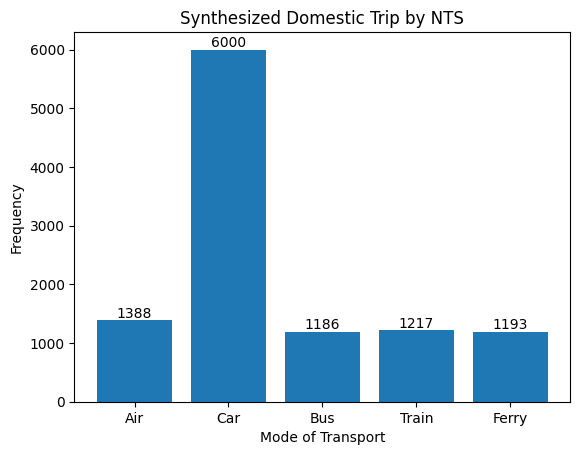

In [ ]:
modes_of_transport = ['Air', 'Car', 'Bus', 'Train', 'Ferry']
Frequency_B = [1388, 6000, 1186, 1217, 1193]
plt.bar(modes_of_transport, Frequency_B)
for i, v in enumerate(Frequency_B):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Synthesized Domestic Trip by NTS')
plt.xlabel('Mode of Transport')
plt.ylabel('Frequency')
plt.show()

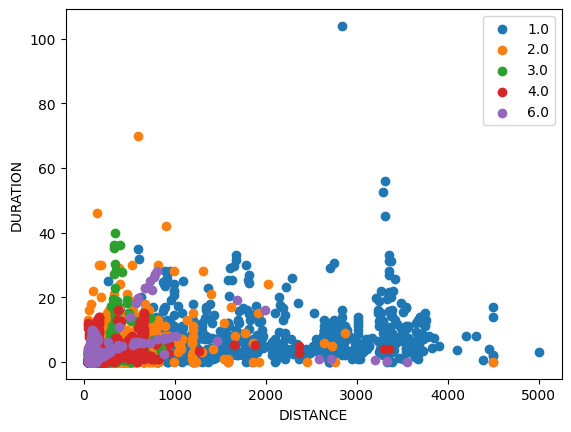

In [ ]:
# scatter plot of examples by class label
# 0 => distance  9 => SPD_DTOT
FI = X_resampled[:, [0, 1]]
for label, _ in counter.items():
    row_ix = np.where(y_resampled == label)[0]
    pyplot.scatter(FI[row_ix, 0], FI[row_ix, 1], label=str(label))
pyplot.xlabel("DISTANCE")
pyplot.ylabel("DURATION")
pyplot.legend()
pyplot.show()

In [ ]:
train_inputs, test_inputs, train_labels, test_labels = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
########################## KNN #################################

In [ ]:
# Set up K-Fold cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# List to hold accuracy scores for each k value
k_scores = []
#k_values = np.arange(1,200)
k_values = np.arange(1,36)
# Test the model using different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_inputs, train_labels, cv=kfold, scoring='accuracy')
    k_scores.append(scores.mean())

# Find the best k value
best_k = np.argmax(k_scores) + 1
print(f'The best value for k is {best_k}')

# Train the model with the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_inputs, train_labels)

# Test the model with the test dataset
y_pred = knn.predict(test_inputs)

# Calculate the accuracy score
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(test_labels, y_pred)
print(f'The accuracy score of the model is {accuracy}')

f1 = f1_score(test_labels, y_pred, average='weighted')
print(f'The F1-score of the model is {f1}')


The best value for k is 1
The accuracy score of the model is 0.8315885298133819
The F1-score of the model is 0.8324002554911119


In [ ]:
unique_classes, counts = np.unique(y_pred, return_counts=True)
print(unique_classes)
print(counts)

[1. 2. 3. 4. 6.]
[ 286 1121  256  277  257]


In [ ]:
unique_classes, counts = np.unique(y_resampled, return_counts=True)
print(unique_classes)
print(counts*100/len(data_t))

[1. 2. 3. 4. 6.]
[14.34180616 61.99628022 12.25459806 12.57491217 12.32692705]


In [ ]:
############################## SVM ###############################################

In [ ]:
clf_sigmoid = SVC(kernel='sigmoid')
scores_sigmoid = cross_val_score(clf_sigmoid, train_inputs, train_labels, cv=10)
print('Average accuracy with sigmoid kernel:', scores_sigmoid.mean())

Average accuracy with sigmoid kernel: 0.389331814730448


In [ ]:
clf_rbf = SVC(kernel='rbf')
scores_rbf = cross_val_score(clf_rbf, train_inputs, train_labels, cv=10)
print('Average accuracy with Gaussian RBF kernel:', scores_rbf.mean())

Average accuracy with Gaussian RBF kernel: 0.6436769366721865


In [ ]:
clf_poly = SVC(kernel='poly')
scores_poly = cross_val_score(clf_poly, train_inputs, train_labels, cv=10)
print('Average accuracy with polynomial kernel:', scores_poly.mean())

Average accuracy with polynomial kernel: 0.6244440643618111


In [ ]:
# fit the classifier with the best kernel on the training data
best_kernel = 'rbf'
clf = SVC(kernel=best_kernel)
clf.fit(train_inputs, train_labels)

# predict the classes of the test data
predicted_targets = clf.predict(test_inputs)

# calculate the accuracy of the classifier on the test data
from sklearn.metrics import accuracy_score , f1_score
accuracy = accuracy_score(test_labels, predicted_targets)
print('Accuracy on test data with', best_kernel, 'kernel:', accuracy)

f1 = f1_score(test_labels, predicted_targets, average='weighted')
print('F1-score on test data with rbf kernel:', f1)

Accuracy on test data with rbf kernel: 0.6404187528447883
F1-score on test data with linear kernel: 0.5352931340731687


In [ ]:
################################ Logistic Regression ######################

In [ ]:
# Set up k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# List to hold accuracy scores for each lambda value
lambda_scores = []
lambdas = np.logspace(-3, 3, num=30) # test 30 different lambda values
#lambdas = range(1,26)
# Test the model using different lambda values
#For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
for l in lambdas:
    #logistic_reg = LogisticRegression(penalty='l2', C=1/l, solver='lbfgs', max_iter=10000)
    logistic_reg = LogisticRegression(penalty='l2', C=1/l, solver='newton-cg', max_iter=1000)
    scores = cross_val_score(logistic_reg, train_inputs, train_labels, cv=kfold, scoring='accuracy')
    lambda_scores.append(scores.mean())

# Find the best lambda value
best_lambda = lambdas[np.argmax(lambda_scores)]
print(f'The best value for lambda is {best_lambda}')

# Train the model with the best lambda value
#logistic_reg = LogisticRegression(penalty='l2', C=1/best_lambda, solver='lbfgs', max_iter=10000)
ogistic_reg = LogisticRegression(penalty='l2', C=1/best_lambda, solver='newton-cg', max_iter=10000)
logistic_reg.fit(train_inputs, train_labels)

# Test the model with the test dataset
y_pred = logistic_reg.predict(test_inputs)

# Calculate the accuracy score
accuracy = accuracy_score(test_labels, y_pred)
print(f'The accuracy score of the model is {accuracy}')

f1 = f1_score(test_labels, y_pred , average='weighted')
print('F1-score on test data with linear kernel:', f1)

The best value for lambda is 35.622478902624444
The accuracy score of the model is 0.700045516613564
F1-score on test data with linear kernel: 0.6173410277896402


In [ ]:
########################### RF ####################################

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=10)

# Fit the random search object to the data
rand_search.fit(train_inputs, train_labels)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

y_pred = best_rf.predict(test_inputs)
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(test_labels, y_pred, average='weighted')
print('F1-score on test data:', f1)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 58}
Accuracy: 0.9276285844333182
F1-score on test data: 0.9268082695659114


In [ ]:
########################### Neural Network ####################################

In [ ]:
def neural_network(train_inputs, train_labels, test_inputs, test_labels):
    # Initialize the MLP classifier
    clf = MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000, random_state=1)

    # Train the classifier
    clf.fit(train_inputs, train_labels)

    # Predict labels on the test set
    predicted_labels = clf.predict(test_inputs)

    # Calculate accuracy and F1-score on the test set
    accuracy = accuracy_score(test_labels, predicted_labels)
    f1 = f1_score(test_labels, predicted_labels, average='weighted')

    print("Test Accuracy:", accuracy)
    print("Test F1-score:", f1)

    return clf

# Call the function with train and test data
clf = neural_network(train_inputs, train_labels, test_inputs, test_labels)

Accuracy: 0.7052463867076363
F1-score: 0.6773760175623054


In [ ]:
########################### Decision Tree ####################################

In [ ]:
def decision_tree(train_inputs, train_labels, test_inputs, test_labels):
    # Initialize the Decision Tree classifier
    clf = DecisionTreeClassifier(random_state=42)

    # Train the classifier
    clf.fit(train_inputs, train_labels)

    # Predict labels for the test set
    y_pred = clf.predict(test_inputs)

    # Calculate accuracy and F1-score on the test set
    accuracy = accuracy_score(test_labels, y_pred)
    f1 = f1_score(test_labels, y_pred, average='weighted')

    print("Test Accuracy:", accuracy)
    print("Test F1-score:", f1)

    return clf

# Call the function with train and test data
clf = decision_tree(train_inputs, train_labels, test_inputs, test_labels)


Accuracy: 0.8811149032992036
F1-score: 0.8812076627557094


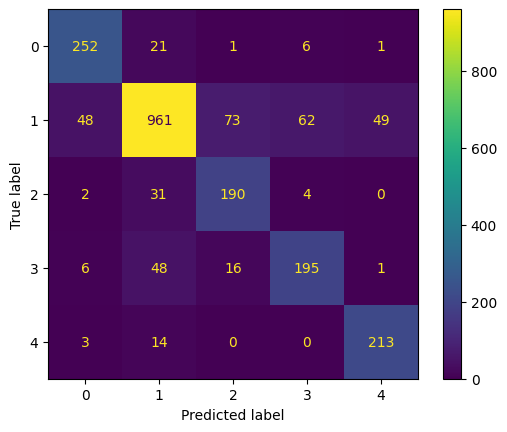

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(test_labels, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();